In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

import pandas as pd
sns.set_theme(rc={"figure.dpi":100, 'savefig.dpi':6000,})
plt.style.use('seaborn-whitegrid')
from plot_utils import plot_icml, load_data_icml, data_dict_icml, create_plot_grid_icml
import plot_utils

/tmp/ipykernel_32132/3204018221.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
2024-05-12 10:31:01.904604: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-12 10:31:02.730671: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
envs = ["Acrobot-v1", "CartPole-v1", "MountainCar-v0", "MountainCarContinuous-v0", "Pendulum-v1", "LunarLander-v2"]

seeds = [237, 379, 482, 672, 886]
algos = ["ppo"]
# seeds = [237, 379, 482, 672]
data = data_dict_icml(algos=algos, envs=envs, seeds=seeds)

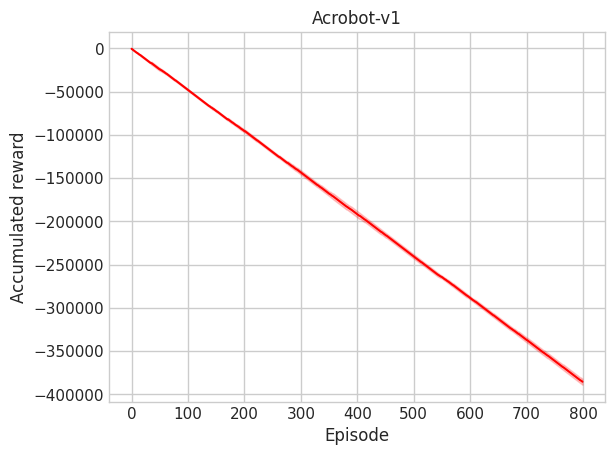

In [3]:
plot_icml(data=data, algos=algos, env="Acrobot-v1",seeds=seeds, ax="accumulated reward")

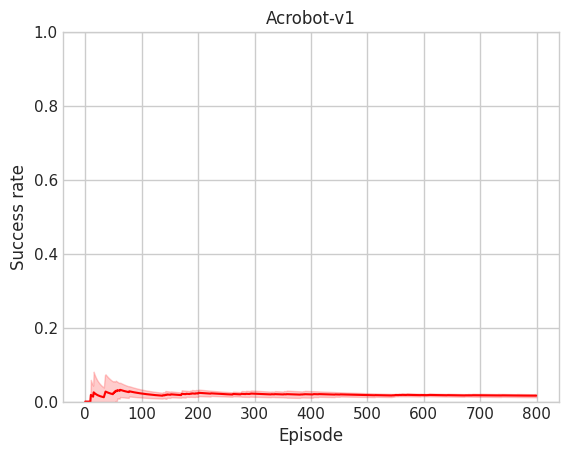

In [4]:
plot_icml(data, algos, "Acrobot-v1", seeds, "success rate")

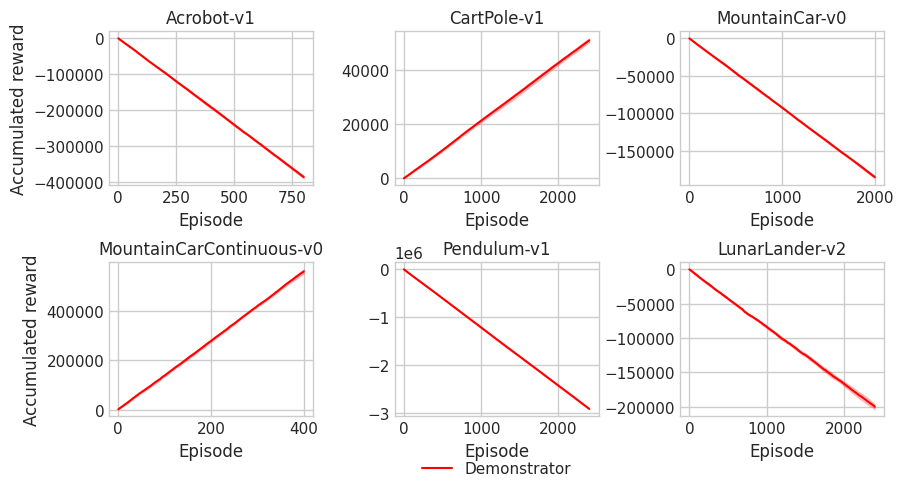

In [5]:
create_plot_grid_icml(
    data=data,
    algos=algos,
    envs=envs,
    seeds=seeds,
    ax="accumulated reward")


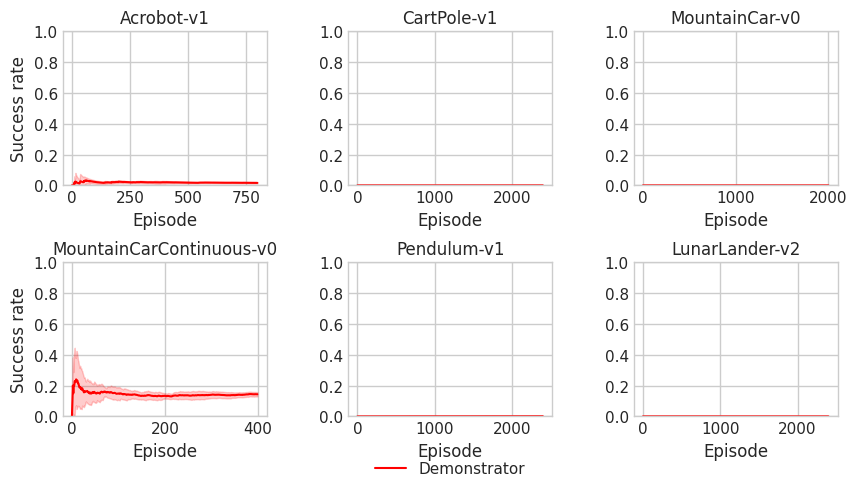

In [6]:
create_plot_grid_icml(data, algos, envs, seeds, "success rate")

In [7]:
import glob


def load_datas_icml(env: str):
    
    path = f"results/icml/{env}/*"
    for name in glob.glob(path):
        # if the file does not contain info in name
        if "info" not in name:
            print(name)
            data = pd.read_csv(name)
            # add column for accumulated reward
            data['accumulated reward'] = data['rewards'].cumsum()

            # add column for success rate
            data['success rate'] = data['success'].mean()

In [8]:
def load_data(env, bin, episodes):
    path = f"results/icml/{env}/icml_{episodes}_{bin}_*"
    for name in glob.glob(path):
        # if the file does not contain info in name
        if "info" not in name:
            print(name)
            data = pd.read_csv(name)
            # add column for accumulated reward
            data['accumulated reward'] = data['rewards'].cumsum()

            # add column for success rate
            data['success rate'] = data['success'].cumsum() / (data.index + 1)
            return data

# load data for k bins
algos = ["ppo"]
envs = ["MountainCarContinuous-v0", "Pendulum-v1"]

episodes = [600, 3600]
bins = [2, 4, 8, 10, 25, 50]
dataKBins = {}
totalReward = {}
for algo in algos:
    dataKBins[algo] = {}
    for env, ep in zip(envs, episodes):
        dataKBins[algo][env] = {}
        totalReward[env] = {}
        for bin in bins:

            dataKBins[algo][env][bin] = load_data(env, bin, ep)
            # total reward for each bin
            totalReward[env][bin] = dataKBins[algo][env][bin]['accumulated reward'].sum()
            


results/icml/MountainCarContinuous-v0/icml_600_2_ppo_400_379.csv
results/icml/MountainCarContinuous-v0/icml_600_4_ppo_400_154.csv
results/icml/MountainCarContinuous-v0/icml_600_8_ppo_400_913.csv
results/icml/MountainCarContinuous-v0/icml_600_10_ppo_400_138.csv
results/icml/MountainCarContinuous-v0/icml_600_25_ppo_400_435.csv
results/icml/MountainCarContinuous-v0/icml_600_50_ppo_400_808.csv
results/icml/Pendulum-v1/icml_3600_2_ppo_2400_882.csv
results/icml/Pendulum-v1/icml_3600_4_ppo_2400_154.csv
results/icml/Pendulum-v1/icml_3600_8_ppo_2400_913.csv
results/icml/Pendulum-v1/icml_3600_10_ppo_2400_138.csv
results/icml/Pendulum-v1/icml_3600_25_ppo_2400_435.csv
results/icml/Pendulum-v1/icml_3600_50_ppo_2400_808.csv


In [9]:
totalReward

{'MountainCarContinuous-v0': {2: 112916657.17711996,
  4: 98038283.01198,
  8: 89815267.33479002,
  10: 90013422.95659,
  25: 80337079.31693004,
  50: 83125455.49527001},
 'Pendulum-v1': {2: -3482399773.678035,
  4: -3503317406.573929,
  8: -3501025488.0204315,
  10: -3526621950.986102,
  25: -3474947265.8753753,
  50: -3517315626.5043902}}

In [10]:
# find highest total reward for each env
maxTotalReward = {}
for env in envs:
    maxTotalReward[env] = max(totalReward[env].values())
maxTotalReward

{'MountainCarContinuous-v0': 112916657.17711996,
 'Pendulum-v1': -3474947265.8753753}

In [11]:
# plot each bin for each method in each env
def plot_k_bins(algo, env, bins, ax):

    for bin in bins:
        plot_data = dataKBins[algo][env][bin]

        plt.plot(plot_data.index, plot_data["accumulated reward"], label=f"{bin} bins")

        # add legend
        plt.legend()
        plt.xlabel("Episode")
        plt.ylabel(ax[0].upper() + ax[1:])
        plt.title(f"{env}-{algo}")
        # if success rate, set y limit to [0,1]
        if ax == "success rate":
            plt.ylim(0, 1)

    plt.show()

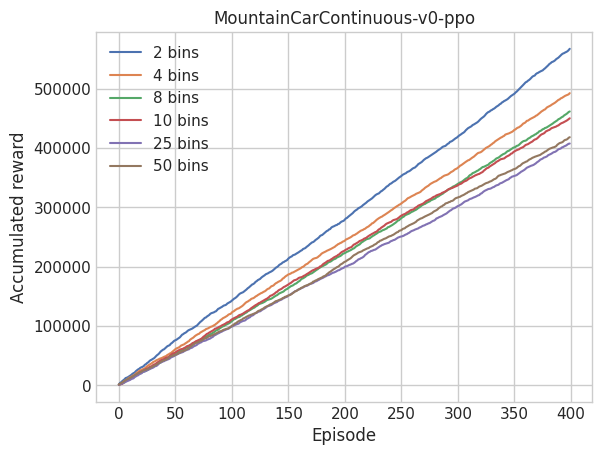

In [12]:
plot_k_bins("ppo", envs[0], bins, "accumulated reward")

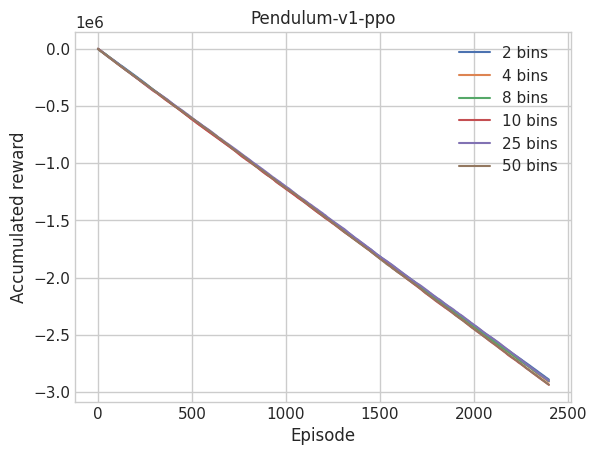

In [13]:
plot_k_bins("ppo", envs[1], bins, "accumulated reward")
